In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 1.2

In [2]:
def repl(X):
    return X*(A@X-np.sum(A*np.outer(X,X)))

In [3]:
def dX_dt(X,t=0):
    return repl(X)

In [4]:
monks = ['Romul\t','Bonaventure','Ambrose\t',
'Berthold','Peter\t','Louis\t','Victor\t',
'Winfrid\t','John\t','Gregory\t','Hugh\t',
'Boniface','Mark\t','Albert\t','Amand\t',
'Basil\t','Elias\t','Simplicius']

In [5]:
mnk = ['Rom','Bov','Amb','Ber','Pet','Lou','Vic','Win','Joh',
'Gre','Hug','Bof','Mar','Alb','Ama','Bas','Eli','Sim']

In [6]:
# Sampson data SAMPLK3 (positive)
LK3 = np.array([
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
[0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [7]:
# Sampson data SAMPES (positive)
ES = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0],
[0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [8]:
# Sampson data SAMPIN (positive)
IN = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0],
[0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0]]).transpose()

In [9]:
# Sampson data SAMPPR (positive)
PR = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0],
[0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],
[0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0],
[0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0]]).transpose()

In [10]:
# Sampson data SAMPDLK (negative)
DLK = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [11]:
# Sampson data SAMPDES (negative)
DES = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [12]:
# Sampson data SAMPNIN (negative)
NIN = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
[0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1],
[0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [13]:
# Sampson data SAMPNPR (negative)
NPR = np.array([
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1],
[0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1],
[0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0],
[0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1],
[0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

In [14]:
# Interaction matrix
n = 18
P = np.sign(LK3+ES+IN+PR)
N = np.sign(DLK+DES+NIN+NPR)
A = P-N
print(A)

[[ 0  0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0 -1]
 [ 1  0  1  1  1  1  1  0  1  1  0  0  0  0  1  0  0  0]
 [ 1  1  0  1  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  0  0  0 -1  0 -1 -1 -1 -1]
 [ 1  1  1  1  0  1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1]
 [ 0  1  0  1  1  0  1  0 -1  0 -1 -1  0 -1  1  0  0 -1]
 [ 0  0  1 -1  0  1  0  0  1  0 -1  0 -1  0  0  0 -1 -1]
 [ 0  0  0  0  0  0 -1  0  1  1  1  1  1  1 -1  0  0  0]
 [ 0  0  1  0 -1 -1  1  1  0  1  1  1  0  0  0  1  0  1]
 [ 0  1  1  0 -1 -1 -1  1  0  0  1  1  1  1 -1 -1  1  1]
 [ 0  0  0  0 -1  0 -1  0  1  0  0  1  0  0  0 -1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  1  0  0  0  0]
 [ 0  0  0 -1 -1 -1  0  1  0  1  0  1  0  1  1  0  0  0]
 [ 0  0  0  0  0  0 -1  0 -1  0  1  0  1  0  0 -1  0  0]
 [ 1  0 -1 -1  0  0 -1  0  0 -1 -1 -1  0 -1  0  1  1  0]
 [ 0 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1 -1 -1 -1  0  1  1]
 [ 0 -1 -1 -1  0 -1 -1 -1  1  0 -1 -1 -1 -1 -1  1  0  1]
 [ 0 -1 -1 -1  0 -1 -1 -1 -1  0

In [15]:
# Katz measure
I = np.identity(n)
Kin = (-I+np.linalg.inv(I-A/n))@np.ones(n)
Ksin = np.sort(Kin)
Krin = [Kin.tolist().index(Ksin[i]) for i in range(n)]
for i in range(n):
    print(monks[Krin[i]],'\t',Ksin[i])

Basil	 	 -0.6199975970556542
Simplicius 	 -0.5944985619500156
Elias	 	 -0.5504193890302712
Amand	 	 -0.3264844685882215
Berthold 	 -0.05923159014066953
Romul	 	 -0.04076855991495769
Albert	 	 -0.030172063908502578
Victor	 	 -0.016744060621894832
Peter	 	 -0.004820885417263471
Hugh	 	 0.007669253854337111
Louis	 	 0.013327422308338194
Mark	 	 0.13600369311705401
Boniface 	 0.17297227128127157
Gregory	 	 0.2897499407765587
Winfrid	 	 0.29127574329626793
Ambrose	 	 0.3012911373460018
John	 	 0.3235117550019888
Bonaventure 	 0.5266572605972154


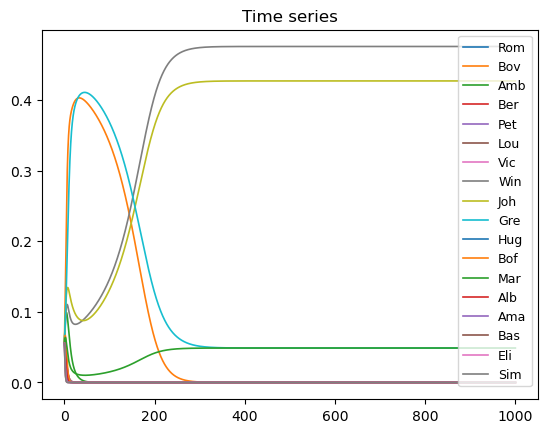

In [16]:
# Replicator dynamics
X0 = np.ones(n)/n
t = np.linspace(0,1000,100001)
X = integrate.odeint(dX_dt,X0,t)
for i in range(n):
    plt.plot(t,X[:,i],label=mnk[i])
plt.legend(loc='upper right',fontsize="9")
plt.title("Time series")
plt.show()

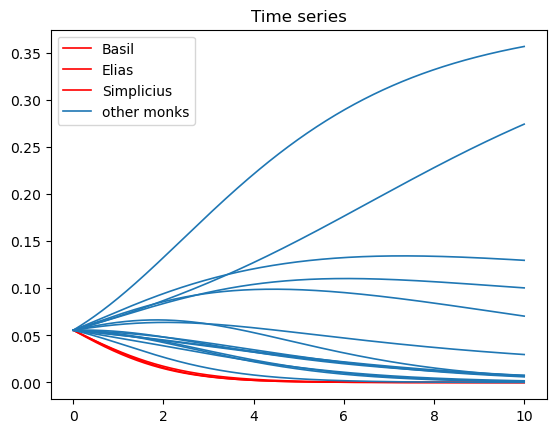

In [17]:
u = np.linspace(0,10,1001)
plt.plot(u,X[:1001,15],label='Basil',color='red')
plt.plot(u,X[:1001,16],label='Elias',color='red')
plt.plot(u,X[:1001,17],label='Simplicius',color='red')
plt.plot(u,X[:1001,0],label='other monks',color='#1f77b4')
for i in range(1,15):
    plt.plot(u,X[:1001,i],color='#1f77b4')
plt.legend(loc='upper left')
plt.title("Time series")
plt.savefig('figure.pdf')
plt.show()

In [18]:
surv = np.ones(n)
for i in range(1,100001):
    for j in range(n):
        if X[i,j]<1e-4 and surv[j] == 1:
            print(i,' ',monks[j])
            surv[j] = 0

682   Simplicius
686   Basil	
784   Elias	
969   Amand	
1367   Romul	
1418   Albert	
1566   Berthold
1889   Boniface
1971   Peter	
2064   Hugh	
2189   Victor	
3005   Louis	
7092   Ambrose	
33934   Bonaventure
